<a href="https://colab.research.google.com/github/WelfLowe/ML4Med/blob/main/AI_4_Med_Technology_Introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examples of regression and classification 

We import some 3rd party libraries that we just use in our examples.

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import norm
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt  
import seaborn as sn

## Collect and Preprocess the Data

The data has been collected. We read the structured data that is stored in a file $\verb|heights_weights.csv|$. Recall that we imported the corresponding library: $\verb|import pandas as pd|$.

Then we map inches to cm ($\times 2.54$) and punds to kg ($\times 0.45$). Then we plot the first 10 datapoints of the data table.

In [ ]:
data = pd.read_csv (r'./heights_weights.csv')
#data['Height'] = data['Height'].map(lambda x: x + 100)
data['Height'] = data['Height'].map(lambda x: x * 2.54)
data['Weight'] = data['Weight'].map(lambda x: x * 0.453592)
print(data.shape[0])
data.head(10)

10000


,Height,Weight,Gender
0,187.571423,109.720985,1
1,174.706036,73.622732,1
2,188.239668,96.497550,1
3,182.196685,99.809504,1
4,177.499761,93.598619,1
5,170.822660,69.042216,1
6,174.714106,83.428219,1
7,173.605229,76.190352,1
8,170.228132,79.800187,1
9,161.179495,70.941642,1


We produce the table for the men ($\verb|'Gender'==1|$) and plot the first five datapoints.

In [ ]:
male =  data['Gender']==1
males = data[male]
males = males.drop('Gender', axis=1)
males.head()

,Height,Weight
0,187.571423,109.720985
1,174.706036,73.622732
2,188.239668,96.497550
3,182.196685,99.809504
4,177.499761,93.598619


Same for the women ($\verb|'Gender'==0|$).

In [ ]:
female =  data['Gender']==0
females = data[female]
females = females.drop('Gender', axis=1)
females.head()

,Height,Weight
5000,149.633259,46.306448
5001,165.684232,64.095191
5002,160.957270,59.439332
5003,163.779193,58.137572
5004,156.954464,58.867808


Convert the data into another format, into a so-called $\verb|numpy|$ arrays. Recall that we imported the corresponding libarary: $\verb|import numpy as np|$.

In [ ]:
#Heights ad weights for males
H_m = males.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
W_m = males.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

#Heights ad weights for females
H_f = females.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
W_f = females.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column

## Train the Models

### Linear Regression Models

We define a training function. It merely uses the trainging function $\verb|fit|$ that is predefined in $\verb|LinearRegression|$. Note, that we imported the corresponding libarary: $\verb|from sklearn.linear_model import LinearRegression|$.

Optionally, we then plot the trained model, a linear function, and all datapoints. Note, that we imported the plotting libarary for that: $\verb|import matplotlib.pyplot as plt|$.

In [ ]:
def linear_regression(X, Y, verbose):
    lr = LinearRegression()  # create object for the class
    lr.fit(X, Y)  # perform linear regression
    Y_pred = lr.predict(X)  # make predictions
    if verbose:
        title = ("Fit Values: a={:.2f} and b={:.2f}".format(lr.coef_[0][0], lr.intercept_[0]))
        plt.scatter(X, Y)
        plt.plot(X, Y_pred, color='red')
        plt.title(title)
        plt.show()
    return lr

We use the training function for the men.

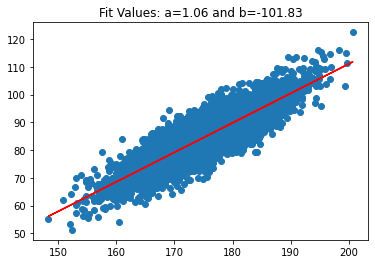

In [ ]:
lr = linear_regression(H_m, W_m, True)
a_m = lr.coef_[0][0]
b_m = lr.intercept_[0]

We use the same training function for the women.

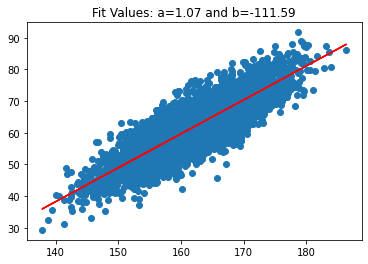

In [ ]:
lr = linear_regression(H_f, W_f, True)
a_f = lr.coef_[0][0]
b_f = lr.intercept_[0]

We define an additional function for plotting the two models and use it.

In [ ]:
def plot_lines(X, aa, bb, cc):
    for i in range(0,len(aa)):
        Y = aa[i]*X+bb[i]
        plt.plot(X, Y, cc[i])
    plt.show()

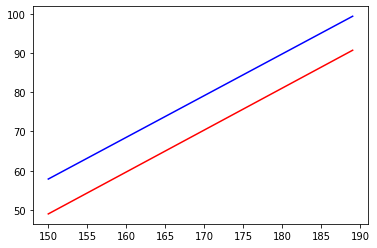

In [ ]:
X = np.arange(150, 190, 1)
plot_lines(X, [a_m, a_f], [b_m,b_f], ['b', 'r'])

<font color='red'>Tasks 1:</font> 
1. In the regression models, what are the predictor and what are the response variables?
2. Give the trained regression models mapping height to weight for men and woman, resp.
2. What is your interpretation of the two models when looking at the plots?

### Distribution Models

Again, we define a training function. It merely uses the trainging function $\verb|fit|$ that is predefined in the $\verb|norm|$ library. Note, that we imported the corresponding libarary: $\verb|from scipy.stats import norm|$.

Optionally, we then plot the trained model, a fitted normal distribution given by $\mu$ and $\sigma$ together with a histogram of all datapoints using again the plotting libarary.

In [ ]:
def fit_normal(X, verbose):
    mu, std = norm.fit(X)
    if verbose:
        # Plot the histogram.
        plt.hist(X, bins=25, density=True, alpha=0.6, color='b')
        # Plot the PDF.
        xmin, xmax = plt.xlim()
        x = np.linspace(xmin, xmax, 100)
        p = norm.pdf(x, mu, std)
        plt.plot(x, p, linewidth=2, color='red')
        title = "Fit Values: mu {:.2f} and sigma {:.2f}".format(mu, std)
        plt.title(title)
        plt.show()
    return mu, std

We use the training function four times. For the males hight and weight, resp., ...

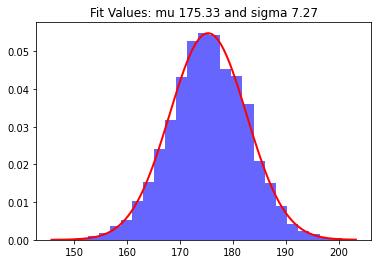

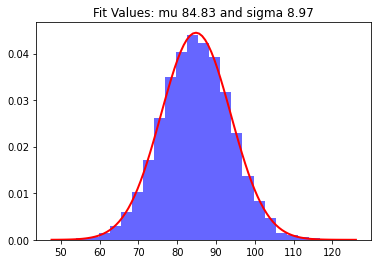

In [ ]:
mu_H_m, sigma_H_m = fit_normal(H_m, True)
mu_W_m, sigma_W_m = fit_normal(W_m, True)

... and for the hight and weight of the females.

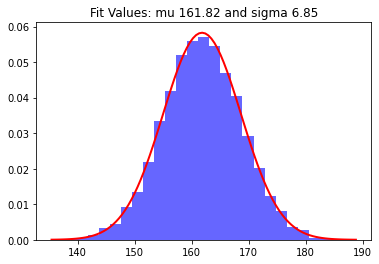

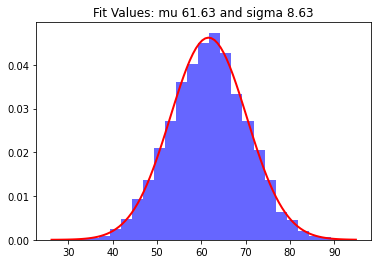

In [ ]:
mu_H_f, sigma_H_f = fit_normal(H_f, True)
mu_W_f, sigma_W_f = fit_normal(W_f, True)

We define an additional function for plotting two distributions of males and females. It can be used for the height and for the weight distributions..

In [ ]:
def plot_norm(mus, sigmas, cc):
    low = mus[0]-4*sigmas[0]
    high = mus[0]+4*sigmas[0]
    for i in range(1,len(mus)):
        low = min(low, mus[i]-4*sigmas[i])
        high = max(high, mus[i]+4*sigmas[i])
    x_axis = np.arange(low, high, 0.1)
    for i in range(0,len(mus)):
        plt.plot(x_axis, norm.pdf(x_axis, mus[i], sigmas[i]), cc[i])
    plt.show()

We use it for plotting the weight distributions ...

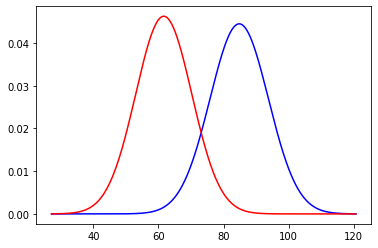

In [ ]:
plot_norm([mu_W_m,mu_W_f],[sigma_W_m,sigma_W_f], ['b','r'])

... and the height distributions.

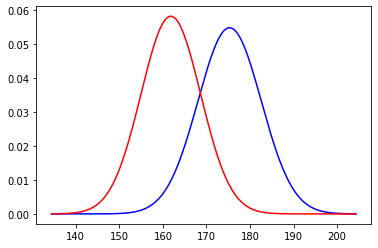

In [ ]:
plot_norm([mu_H_m,mu_H_f],[sigma_H_m,sigma_H_f], ['b','r'])

<font color='red'>Tasks 2:</font> 
1. What are implicit assumption on the collected data so that the models are valid?
2. Specify the four trained distribution models of height and weight for men and woman, resp.
3. What is your interpretation of the four models when looking at the plots?

## Evaluste and Use the Models

### Use Linear Regression for Prediction

We use the regression models to predict the weight based on height and gender. Therefore, we apply the male or female model on the actual persons height.

In [ ]:
def predict_weight(male, height):
    if male:
        return a_m*height + b_m
    else:
        return a_f*height + b_f

welfs_act_weight = 70 #in kg
welfs_act_height = 170 #in cm
welfs_predicted_weight = predict_weight(male=True, height=welfs_act_height) #result in kg
welfs_err = welfs_act_weight-welfs_predicted_weight #in kg
welfs_err 

-9.159749477266047

### Use the Distribution Models for (Naive Bayesian) Classification

We use the trained distribution models for classifying whether a person is likely to be (fe-)male based on weight and height. Under Naive Bayesian assumption, we multiply the probabilities of of a weight and height to occur in the male and female distributions. The higher joint probability determines the suggested gender. 

In [ ]:
def male_female(act_weight,act_height): 
    p_male = norm.pdf(act_weight, mu_W_m, sigma_W_m)*norm.pdf(act_height, mu_H_m, sigma_H_m)
    p_female = norm.pdf(act_weight, mu_W_f, sigma_W_f)*norm.pdf(act_height, mu_H_f, sigma_H_f)
    if p_male > p_female:
        return 1
    else:
        return 0    

In [ ]:
if male_female(welfs_act_weight, welfs_act_height):
    print("Male")
else:
    print("Female")    

Female


:)

Classify all datapoints.

In [ ]:
df_test = pd.DataFrame()
df_test['True Gender'] = data['Gender']
df_test['Pred Gender'] = data.apply(lambda x: male_female(x['Weight'] , x['Height']), axis=1)
df_test.head(10)

,True Gender,Pred Gender
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
5,1,0
6,1,1
7,1,1
8,1,1
9,1,0


Show confusion matrix.

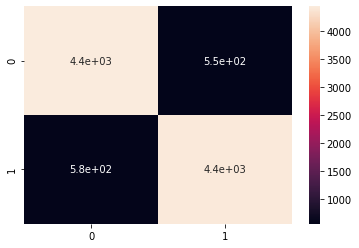

In [ ]:
cf_matrix = confusion_matrix(df_test.iloc[:, 0].values.reshape(-1, 1) , df_test.iloc[:, 1].values.reshape(-1, 1)) 
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))
sn.heatmap(df_cm, annot=True)
plt.show()

### Use the Distribution Models for Anomaly Detection

Use the trained distribution models to check whether (s)he is over- or underweighted. We check how likely it is to find another person of the same gender with a equal or lower weight (in percent). 

In [ ]:
def percentile_weight(male, x):
    if male:
        return norm.cdf(x, mu_W_m, sigma_W_m)
    else:
        return norm.cdf(x, mu_W_f, sigma_W_f)

welfs_percentile_weight = percentile_weight(True,welfs_act_weight)*100
welfs_percentile_weight

4.915548866297606

<font color='red'>Tasks 3:</font> Pick your own (or a fictive person's) gender, weight, and height. Then
1. Use the regression models to predict the person's weight based on his/her height and gender.
2. Use the distribution models for classifying whether the person is likely to be (fe-)male based on weight and height.
3. Use the distribution models to check whether (s)he is over- or underweighted.